In [2]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
# Define the path to the train folder containing images of dogs and cats
train_data_dir = 'sample/train'
# Define the path to the val folder containing images of dogs and cats
validation_data_dir = 'sample/validation'
# Define the path to the val folder containing images of dogs and cats
test_data_dir = 'sample/test'

# Set up data augmentation
train_datagen = image.ImageDataGenerator(rescale=1./255)

# Load and augment the training dataset
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

# Set up data augmentation
validation_datagen = image.ImageDataGenerator(rescale=1./255)

# Load and augment the training dataset
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

# Set up data augmentation
test_datagen = image.ImageDataGenerator(rescale=1./255)

# Load and augment the training dataset
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(150, 150),
    class_mode='categorical'
)

Found 999 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [4]:
# Build the CNN model
model=Sequential()
#Adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding convolution layer
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#Adding dense layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32,activation='softmax'))

In [5]:
# compile model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [11]:
# train the model
history = model.fit(train_generator, epochs=50, validation_data=validation_generator)

Epoch 1/50
32/32 [==============================] - 43s 1s/step - loss: 2.3010e-04 - accuracy: 1.0000 - val_loss: 2.3350 - val_accuracy: 0.7100
Epoch 2/50
32/32 [==============================] - 44s 1s/step - loss: 2.0732e-04 - accuracy: 1.0000 - val_loss: 2.3478 - val_accuracy: 0.7100
Epoch 3/50
32/32 [==============================] - 51s 2s/step - loss: 1.8864e-04 - accuracy: 1.0000 - val_loss: 2.3682 - val_accuracy: 0.7100
Epoch 4/50
32/32 [==============================] - 57s 2s/step - loss: 1.7335e-04 - accuracy: 1.0000 - val_loss: 2.3696 - val_accuracy: 0.7200
Epoch 5/50
32/32 [==============================] - 42s 1s/step - loss: 1.5934e-04 - accuracy: 1.0000 - val_loss: 2.4091 - val_accuracy: 0.7000
Epoch 6/50
32/32 [==============================] - 39s 1s/step - loss: 1.4495e-04 - accuracy: 1.0000 - val_loss: 2.4278 - val_accuracy: 0.7100
Epoch 7/50
32/32 [==============================] - 49s 2s/step - loss: 1.3289e-04 - accuracy: 1.0000 - val_loss: 2.4454 - val_accuracy:

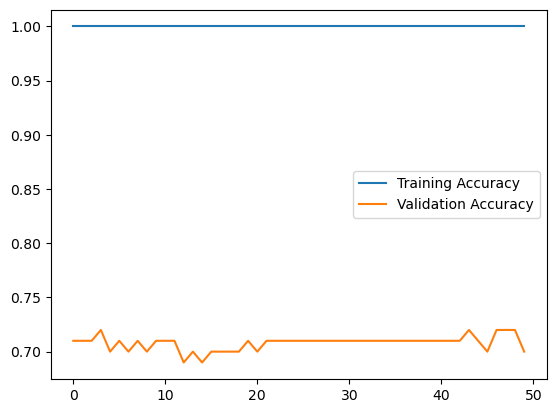

In [12]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

7/7 [==============================] - 3s 338ms/step - loss: 4.1499 - accuracy: 0.6100
Test Accuracy: 61.00%


In [15]:
directory_path = 'sample/predict'
# List all files in the specified directory
files = os.listdir(directory_path)

# Iterate through the files and move those starting with 'dog_' to the 'dog' folder
for file in files:
    image_path = os.path.join(directory_path, file)
    
    if os.path.isfile(os.path.join(directory_path, file)):
        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)  # Add an extra dimension to match the model's expected input shape
        img_array /= 255.0  # Normalize pixel values to be in the range [0, 1]

        # Make a prediction
        prediction = model.predict(img_array)
        print(prediction)

        # `predictions` is a numpy array containing the predicted probabilities for each class
        # You can further process these predictions based on your specific use case
        # Assuming you have `predictions` from the previous code

        # Get the predicted class index
        predicted_class_index = np.argmax(prediction)

        # Define your class labels
        class_labels = ['cat', 'dog']

        # Get the corresponding class label
        predicted_class_label = class_labels[predicted_class_index]

        # Get the confidence score for the predicted class
        confidence_score = prediction[0, predicted_class_index]

        # Display the results
        print(f'Predicted Class: {predicted_class_label}')
        print(f'Confidence Score: {confidence_score * 100:.2f}%')


1/1 [==============================] - 0s 125ms/step
[[9.99884605e-01 1.15348936e-04]]
Predicted Class: cat
Confidence Score: 99.99%
1/1 [==============================] - 0s 85ms/step
[[9.999260e-01 7.405674e-05]]
Predicted Class: cat
Confidence Score: 99.99%
1/1 [==============================] - 0s 82ms/step
[[0.4278868  0.57211316]]
Predicted Class: dog
Confidence Score: 57.21%
1/1 [==============================] - 0s 93ms/step
[[9.9997509e-01 2.4884128e-05]]
Predicted Class: cat
Confidence Score: 100.00%
1/1 [==============================] - 0s 83ms/step
[[0.52782446 0.4721755 ]]
Predicted Class: cat
Confidence Score: 52.78%
1/1 [==============================] - 0s 97ms/step
[[1.0000000e+00 1.2603996e-10]]
Predicted Class: cat
Confidence Score: 100.00%
1/1 [==============================] - 0s 94ms/step
[[0.7516124  0.24838759]]
Predicted Class: cat
Confidence Score: 75.16%
1/1 [==============================] - 0s 76ms/step
[[0.9614283  0.03857167]]
Predicted Class: cat
Confid